# Getting the Data

Importing earth engine

In [1]:
import ee

# Initialize the Earth Engine module.
ee.Initialize()

# Print earth engine version
print(ee.__version__)

0.1.307


Initializing the vars for sentinel 2 and cloud cover filter

In [2]:
imgcol=ee.ImageCollection('COPERNICUS/S2_SR').filterDate('2021-01-01','2021-01-30')
data = imgcol.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20))
print(data)

ee.ImageCollection({
  "functionInvocationValue": {
    "functionName": "Collection.filter",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "ImageCollection.load",
                "arguments": {
                  "id": {
                    "constantValue": "COPERNICUS/S2_SR"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.dateRangeContains",
                "arguments": {
                  "leftValue": {
                    "functionInvocationValue": {
                      "functionName": "DateRange",
                      "arguments": {
                        "end": {
                          "constantValue": "2021-01-30"
                        },
    

Setting the location for the region selection

In [3]:
geojson= {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              72.42256164550781,
              23.074006981161965
            ],
            [
              72.43389129638672,
              23.074006981161965
            ],
            [
              72.43389129638672,
              23.083660005846124
            ],
            [
              72.42256164550781,
              23.083660005846124
            ],
            [
              72.42256164550781,
              23.074006981161965
            ]
          ]
        ]
      }
    }
  ]
}

coords = geojson['features'][0]['geometry']['coordinates']
aoi = ee.Geometry.Polygon(coords)
print(aoi)

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              72.42256164550781,
              23.074006981161965
            ],
            [
              72.43389129638672,
              23.074006981161965
            ],
            [
              72.43389129638672,
              23.083660005846124
            ],
            [
              72.42256164550781,
              23.083660005846124
            ],
            [
              72.42256164550781,
              23.074006981161965
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})


Checking the available bands

In [4]:
img=ee.Image(data.filterBounds(aoi).median().clip(aoi))
print('Bands:',img.bandNames().getInfo())

Bands: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12', 'AOT', 'WVP', 'SCL', 'TCI_R', 'TCI_G', 'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 'QA10', 'QA20', 'QA60']


# Visualization

Importing libraries required for visualization

In [5]:
import skimage.io
import numpy as np
from PIL import Image
import IPython.display as disp

Visualizing true RGB bands

In [6]:
url = img.select(['TCI_R', 'TCI_G', 'TCI_B']).getThumbURL({'min': 0,'max': 255,'dimensions': 512})
print(url)
nprgbimg=skimage.io.imread(url)[:,:,:3]
print('np shape:',nprgbimg.shape)
disp.Image(url=url, width=800)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/87445746e04ff2d2aa1f3b814218f609-451c63fcecbc2e437dc80e7f1b6acbcc:getPixels
np shape: (437, 512, 3)


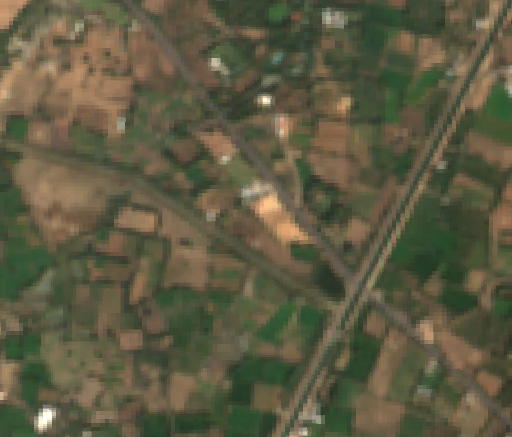

In [7]:
#Generating numpy array for the image
disp.display(Image.fromarray(nprgbimg))

Getting the NDVI for the data and thresholding at 0

In [8]:
url = img.normalizedDifference(['B8', 'B4']).getThumbURL({'min': 0,'max': 1,'dimensions': 512})
print(url)
npndviimg=skimage.io.imread(url)[:,:,0]
print('np shape:',npndviimg.shape)
disp.Image(url=url, width=800)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/058365e8d58d54ba4985132bbbce5854-3a0e63d7225beacdecfdb717ae74b546:getPixels
np shape: (437, 512)


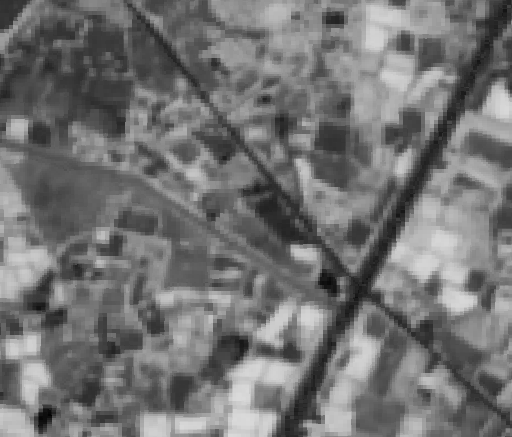

In [9]:
#numpy array of the ndvi pixels
disp.display(Image.fromarray(npndviimg,'L'))

Red Edge bands visualization

In [10]:
import IPython.display as disp
url = img.select(['B7', 'B6', 'B5']).getThumbURL({'min': 0,'max': 4096,'dimensions': 512})
print(url)
nprededgeimg=skimage.io.imread(url)[:,:,:3]
print('np shape:',nprededgeimg.shape)
disp.Image(url=url, width=800)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/e842effc80a39fad66515826df5c4f80-9e20c3f82d2e8d52086beaa75511f60a:getPixels
np shape: (437, 512, 3)


Canopy water index using SWIR

In [11]:
url = img.normalizedDifference(['B8', 'B11']).getThumbURL({'min': -1,'max': 1,'dimensions': 512})
print(url)
npcwimg=skimage.io.imread(url)[:,:,0]
print('np shape:',npcwimg.shape)
disp.Image(url=url, width=800)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/d49ff7d3214a6f45a5d5df49a980718f-1c5af762b769c1e1b0cede424d2c7e49:getPixels
np shape: (437, 512)


Canopy Chlorophyll Content Index

In [42]:
url = img.normalizedDifference(['B8', 'B5']).getThumbURL({'min': 0,'max': 1,'dimensions': 512})
print(url)
npccciimg=skimage.io.imread(url)[:,:,0]
print('np shape:',npccciimg.shape)
disp.Image(url=url, width=800)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/01f47511f7aab37e598e69dfdedb8031-cb8733ed737dfc7702710c66c7955d7b:getPixels
np shape: (437, 512)


Using RedEdge and Red bands to check where RedEdge spikes

Calling it rededge index

In [13]:
url = img.normalizedDifference(['B5', 'B4']).getThumbURL({'min': 0,'max': 1,'dimensions': 512})
print(url)
reindex=skimage.io.imread(url)[:,:,0]
print('np shape:',reindex.shape)
disp.Image(url=url, width=800)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/6cfc61af0212e9e92cfcb8730d4ae296-912fa1a12e435112fe32207436bd43dd:getPixels
np shape: (437, 512)


Visualizing RGB image with NDVI(0 clipped) as mask

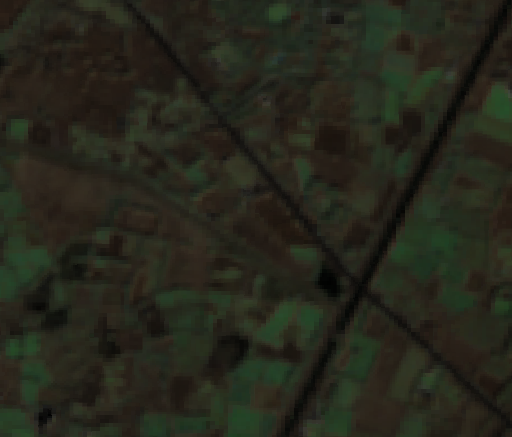

In [14]:
temp=nprgbimg.copy().astype(np.float64)
temp*=(npndviimg/255)[:,:,None]
disp.display(Image.fromarray(temp.astype(np.uint8)))

Visualizing RGB image with Canopy water index as mask

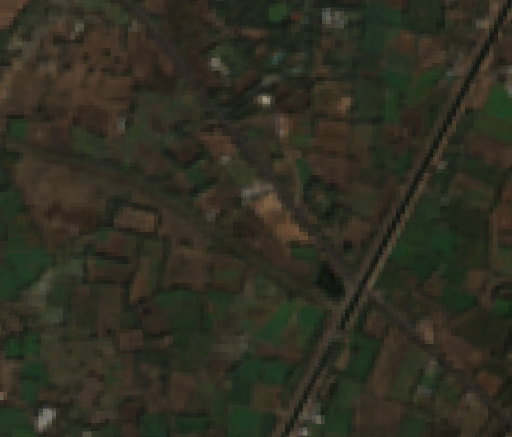

In [15]:
temp=nprgbimg.copy().astype(np.float64)
temp*=(npcwimg/255)[:,:,None]
disp.display(Image.fromarray(temp.astype(np.uint8)))

# Finding the difference between average feilds and partially diseased field

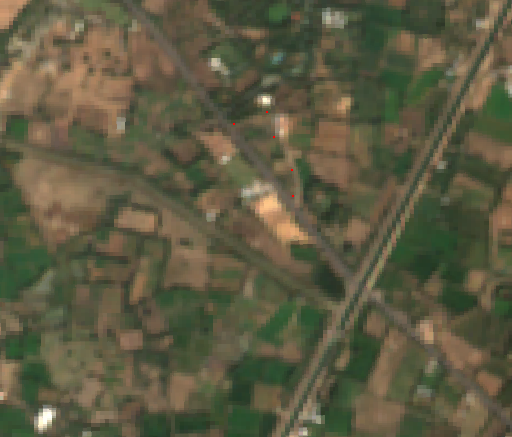

In [16]:
field=[[234,124],[267,112],[274,137],[292,170],[293,196]]
temp=nprgbimg.copy()
for each in field:    
    temp[each[1]-1:each[1]+1,each[0]-1:each[0]+1,:]=[255,0,0]
disp.display(Image.fromarray(temp))

Generating mask from the field points

(437, 512)


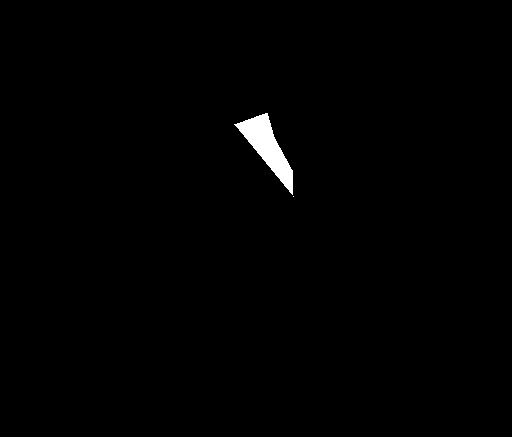

In [17]:
from matplotlib.path import Path

x, y = np.meshgrid(np.arange(nprgbimg.shape[1]), np.arange(nprgbimg.shape[0])) # make a canvas with coordinates
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T 

p = Path(field) # make a polygon
grid = p.contains_points(points)
mask = grid.reshape(nprgbimg.shape[0],nprgbimg.shape[1])
print(mask.shape)
disp.display(Image.fromarray(mask))

Overlaying the mask on the image to visualize the mask

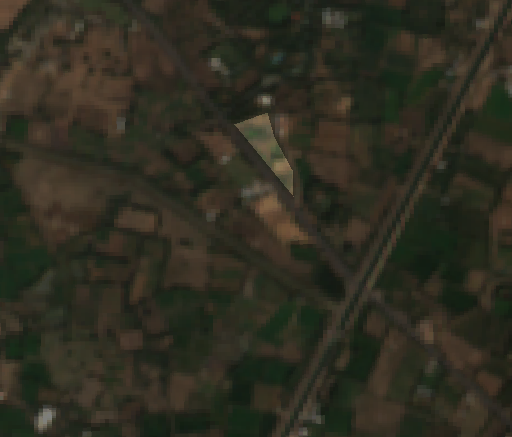

In [18]:
temp=nprgbimg.copy().astype(np.float64)
temp*=((mask+1)/2)[:,:,None]
disp.display(Image.fromarray(temp.astype(np.uint8)))

Plotting NDVI values with respect to the mask

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numba

Making a function to count pixels differentiated by mask

In [20]:
@numba.njit
def get_pixel_count(pixarr,mask,threshold=0,isint=True,ndvi=None,ndviThreshold=0,printInfo=True,alias=''):
    outsideMask=[]
    insideMask=[]
    cpy=pixarr.copy()
    for i in range(pixarr.shape[0]):
        for j in range(pixarr.shape[1]):
            value=pixarr[i,j]
            if isint:
                value/=255
            ndviVal=0
            if ndvi is not None:
                ndviVal=npndviimg[i,j]/255
            if value>=threshold and ndviVal>=ndviThreshold:            
                if mask[i,j]>0.5:
                    insideMask.append(value)
                else:
                    outsideMask.append(value)
            else:
                cpy[i,j]=0
    if printInfo:
        print('Pixels inside mask','['+alias+']' if alias!='' else '',':',len(insideMask),
              '\tAverage value:',sum(insideMask)/len(insideMask),
              '\nPixels outside mask','['+alias+']' if alias!='' else '',':',len(outsideMask),
              '\tAverage value:',sum(outsideMask)/len(outsideMask))
        
    return insideMask,outsideMask,cpy

Plotting density graph for NDVI inside the mask and  outside the mask to compare them

Pixels inside mask  : 1733 	Average value: 0.4545444259642727 
Pixels outside mask  : 222011 	Average value: 0.45085748710036794


<AxesSubplot:ylabel='Density'>

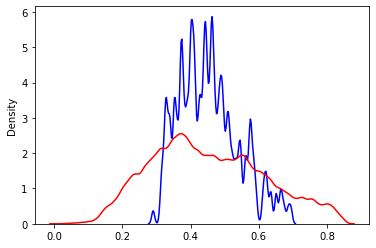

In [21]:
insideMask,outsideMask,threshMask=get_pixel_count(npndviimg,mask)
sns.kdeplot(np.array(insideMask), bw_method=0.05,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')

Clipping at NDVI>0.35 and calculating pixels

Pixels inside mask  : 1548 	Average value: 0.469460910979381 
Pixels outside mask  : 153845 	Average value: 0.5320408177570906


<AxesSubplot:ylabel='Density'>

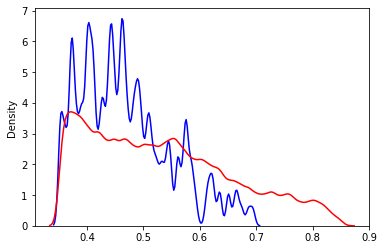

In [22]:
insideMask,outsideMask,threshMask=get_pixel_count(npndviimg,mask,threshold=0.35)
sns.kdeplot(np.array(insideMask), bw_method=0.05,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')

Smoothing out the blue line(diseased area) in the above plot

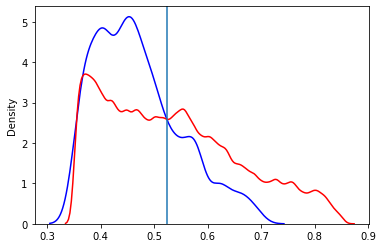

In [23]:
sns.kdeplot(np.array(insideMask), bw_method=0.20,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')
plt.axvline(0.523, 0,5)

NDVI>0.35 clipped image

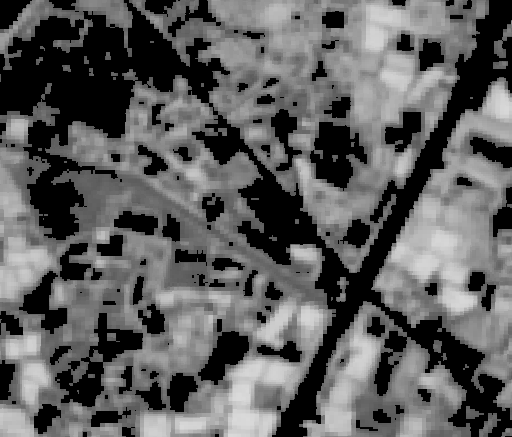

In [24]:
disp.display(Image.fromarray(threshMask))

Plotting canopy water index for diseased area vs average area

Pixels inside mask  : 1733 	Average value: 0.5300317934444353 
Pixels outside mask  : 220205 	Average value: 0.5280424524205782


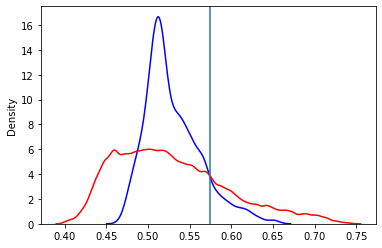

In [25]:
insideMask,outsideMask,threshMask=get_pixel_count(npcwimg,mask,threshold=0.4)
sns.kdeplot(np.array(insideMask), bw_method=0.20,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')
plt.axvline(0.575, 0,5)

Plotting canopy index distribution for diseased area vs average area with pixels with NDVI>0.35 for canopy water index>0.4

Pixels inside mask  : 1548 	Average value: 0.5343086588640559 
Pixels outside mask  : 153827 	Average value: 0.5512992249888001


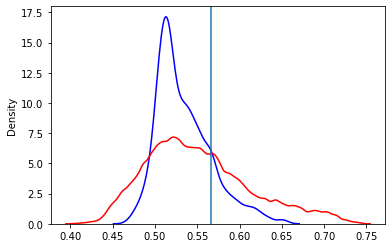

In [26]:
insideMask,outsideMask,threshMask=get_pixel_count(npcwimg,mask,threshold=0.4,ndvi=npndviimg,ndviThreshold=0.35)
sns.kdeplot(np.array(insideMask), bw_method=0.20,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')
plt.axvline(0.5665, 0,5)

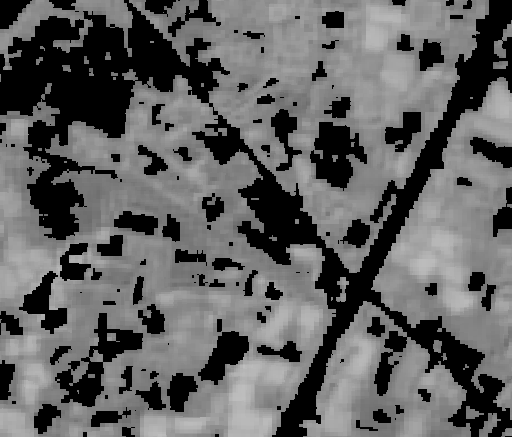

In [27]:
disp.display(Image.fromarray(threshMask))

Plotting red edge index for diseased area vs average area

Plot info

| Row Name | Column 1 | Column 2 |
| --- | --- | --- |
| Row 1 | Red Edge Band 1 | Red Edge Band 1 with NDVI threshold |
| Row 2 | Red Edge Band 2 | Red Edge Band 2 with NDVI threshold |
| Row 3 | Red Edge Band 3 | Red Edge Band 3 with NDVI threshold |

Pixels inside mask [Red Edge Band 1 Without NDVI threshold] : 1733 	Average value: 0.5717886923955932 
Pixels outside mask [Red Edge Band 1 Without NDVI threshold] : 222011 	Average value: 0.5650756043618723
Pixels inside mask [Red Edge Band 1 With NDVI threshold] : 1548 	Average value: 0.5721082231342111 
Pixels outside mask [Red Edge Band 1 With NDVI threshold] : 153845 	Average value: 0.5969978441504332
Pixels inside mask [Red Edge Band 2 Without NDVI threshold] : 1733 	Average value: 0.5110168245024496 
Pixels outside mask [Red Edge Band 2 Without NDVI threshold] : 222011 	Average value: 0.49917826894463735
Pixels inside mask [Red Edge Band 2 With NDVI threshold] : 1548 	Average value: 0.510769113847091 
Pixels outside mask [Red Edge Band 2 With NDVI threshold] : 153845 	Average value: 0.5215566979497497
Pixels inside mask [Red Edge Band 3 Without NDVI threshold] : 1733 	Average value: 0.32472081735175456 
Pixels outside mask [Red Edge Band 3 Without NDVI threshold] : 222011 	Avera

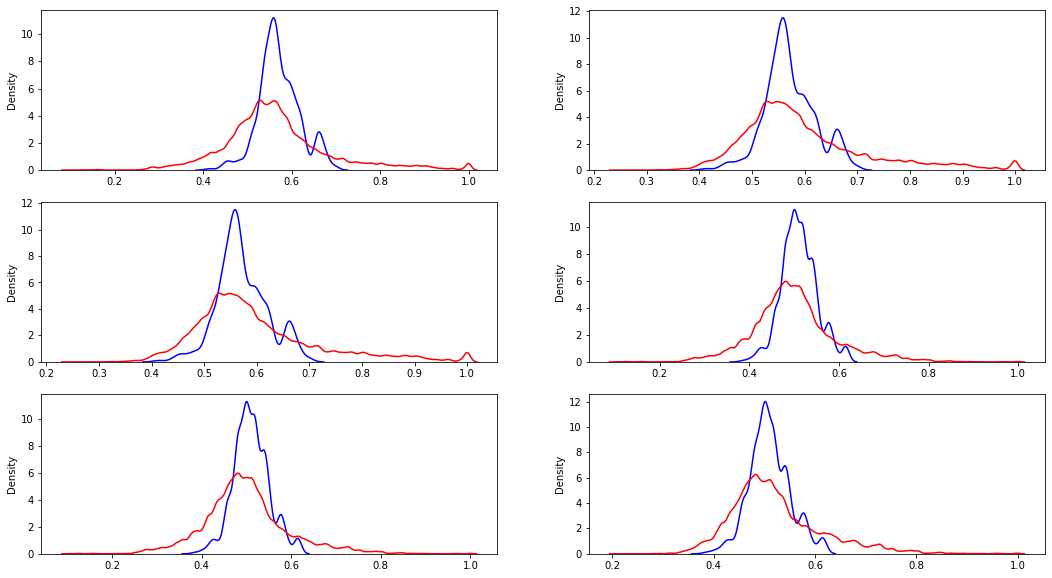

In [28]:
insideMask=[]
outsideMask=[]
for i in range(3):    
    a,b,_=get_pixel_count(nprededgeimg[:,:,i],mask,alias='Red Edge Band '+str(i+1)+' Without NDVI threshold')
    insideMask.append(a)
    outsideMask.append(b)
    a,b,_=get_pixel_count(nprededgeimg[:,:,i],mask,ndvi=npndviimg,ndviThreshold=0.35,alias='Red Edge Band '+str(i+1)+' With NDVI threshold')
    insideMask.append(a)
    outsideMask.append(b)


fig, axes = plt.subplots(3, 2, figsize=(18, 10))
for i in range(3):
    sns.kdeplot(np.array(insideMask[i]), ax=axes[i,0],bw_method=0.20,color='blue')
    sns.kdeplot(np.array(outsideMask[i]), ax=axes[i,0],bw_method=0.05,color='red')
    sns.kdeplot(np.array(insideMask[i+1]), ax=axes[i,1],bw_method=0.20,color='blue')
    sns.kdeplot(np.array(outsideMask[i+1]), ax=axes[i,1],bw_method=0.05,color='red')


Plotting Canopy Chlorophyll Content Index index distribution for diseased area vs average area with pixels with NDVI>0.35

Pixels inside mask  : 1548 	Average value: 0.6581370015706466 
Pixels outside mask  : 153845 	Average value: 0.6785876286227445


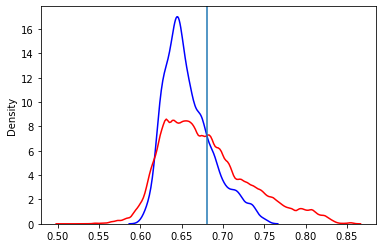

In [29]:
insideMask,outsideMask,threshMask=get_pixel_count(npccciimg,mask,threshold=0,ndvi=npndviimg,ndviThreshold=0.35)
sns.kdeplot(np.array(insideMask), bw_method=0.20,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')
plt.axvline(0.681, 0,5)

Pixels inside mask  : 1548 	Average value: 0.1833763996554711 
Pixels outside mask  : 153845 	Average value: 0.22806420263854782


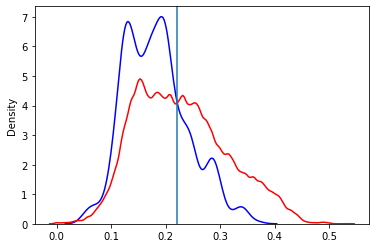

In [30]:
insideMask,outsideMask,threshMask=get_pixel_count(reindex,mask,threshold=0,ndvi=npndviimg,ndviThreshold=0.35)
sns.kdeplot(np.array(insideMask), bw_method=0.20,color='blue')
sns.kdeplot(np.array(outsideMask), bw_method=0.05,color='red')
plt.axvline(0.22, 0,5)

# Decision Tree

Imports

In [31]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from dtreeviz.trees import dtreeviz # remember to load the package

Function to get the data

In [32]:
def getBands(img,takeBands,extra=[]):    
    xraw=[]

    for band in takeBands:
        print('Getting',band,end='\t')
        url = img.select(band).getThumbURL({'min': 0,'max': 255,'dimensions': 512})  
        xraw.append(skimage.io.imread(url)[:,:,0])
        print(xraw[-1].shape)
        
    for band in extra:
        xraw.append(band)
        print(xraw[-1].shape)
        
    xraw=np.array([i.flatten() for i in xraw])

    xraw=xraw.transpose()
    print('Features shape',xraw.shape)
    return xraw

Function to process data

Processing done
- Takes mask and counts pixels in healthy and diseased class
- Balances the pixels on count
- Uses NDVI to thrshold to farm area

In [33]:
def processData(xraw,yraw,mask,npndviimg,ndvithresh=0.35):
    unique, counts = np.unique(mask, return_counts=True)
    print('total healthy & diseased pixel',counts)
    getAtEvery=counts[0]/counts[1]
    print('Get a healthy pixel for every',getAtEvery,'diseased pixel')
    x=[]
    y=[]
    ndvif=npndviimg.flatten()/255

    getAtCount=0
    for i in range(len(ndvif)):
        if ndvif[i]>=ndvithresh: 
            take=False
            if yraw[i]==1:
                take=True
            else:
                getAtCount+=1
                if getAtCount>=getAtEvery:
                    take=True
                    getAtCount-=getAtEvery

            if take:
                x.append(xraw[i])
                y.append(yraw[i])

    x=np.array(x)
    y=np.array(y)
    print('Converted into\tX:',x.shape,'\tY:',y.shape)
    return x,y

Getting the data for decision tree

In [34]:
takeBands=['TCI_R','TCI_G','TCI_B','B8']
x,y=processData(getBands(img,takeBands),mask.flatten(),mask,npndviimg)
print('Shape of x and y',x.shape,y.shape)

Getting TCI_R	(437, 512)
Getting TCI_G	(437, 512)
Getting TCI_B	(437, 512)
Getting B8	(437, 512)
Features shape (223744, 4)
total healthy & diseased pixel [222011   1733]
Get a healthy pixel for every 128.10790536641662 diseased pixel
Converted into	X: (2748, 4) 	Y: (2748,)
Shape of x and y (2748, 4) (2748,)


Fitting data into decision tree

In [35]:
clf = DecisionTreeClassifier(max_depth=4,random_state=1234)
model = clf.fit(x, y)

Plotting the tree

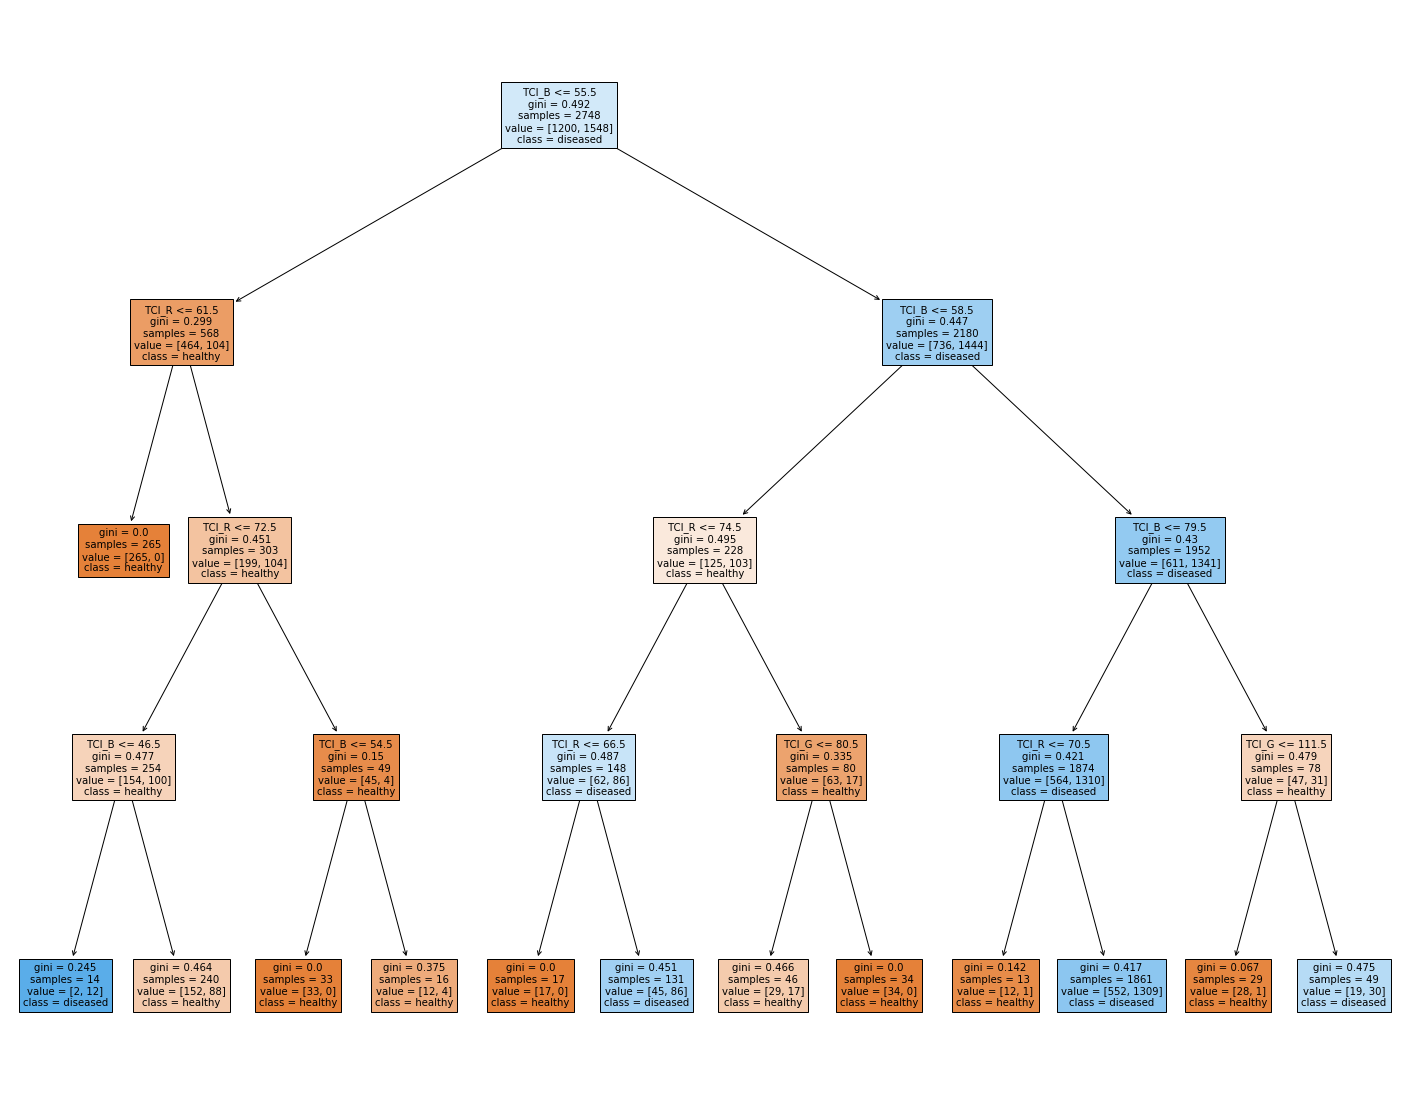

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=takeBands,  
                   class_names=['healthy','diseased'],
                   filled=True)

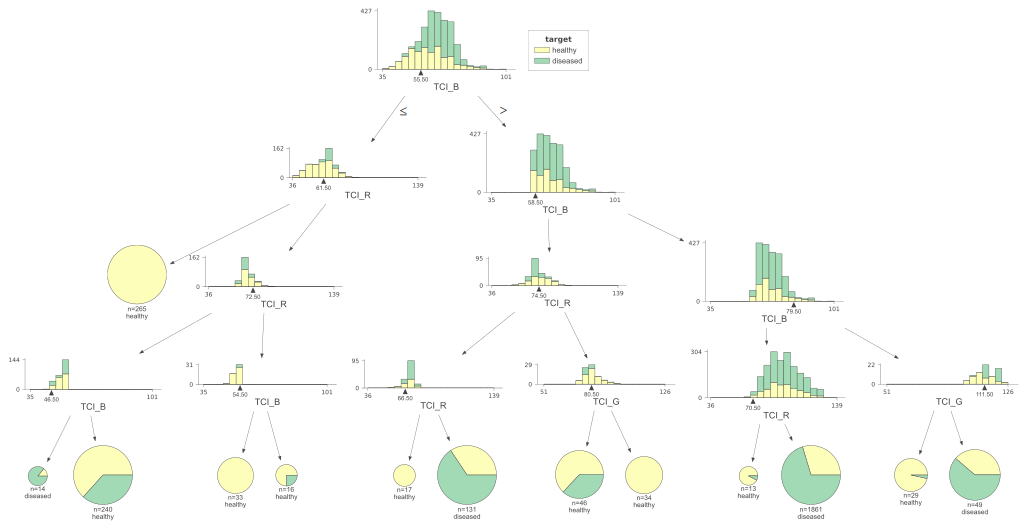

In [37]:
viz = dtreeviz(clf, x, y,
                target_name="target",
                feature_names=takeBands,
                class_names=['healthy','diseased'])

viz

Using different index values for decision tree

In [38]:
takeBands=['NDVI','Water Index','Chloro Index','reindex']
x,y=processData(getBands(img,[],extra=[npndviimg.flatten()/255,((npcwimg.flatten()/255)-0.5)*2,((npccciimg.flatten()/255)-0.5)*2,(reindex.flatten()/255)*2]),mask.flatten(),mask,npndviimg)
print('Shape of x and y',x.shape,y.shape)

(223744,)
(223744,)
(223744,)
(223744,)
Features shape (223744, 4)
total healthy & diseased pixel [222011   1733]
Get a healthy pixel for every 128.10790536641662 diseased pixel
Converted into	X: (2748, 4) 	Y: (2748,)
Shape of x and y (2748, 4) (2748,)


In [39]:
clf = DecisionTreeClassifier(max_depth=4,random_state=8585)
model = clf.fit(x, y)

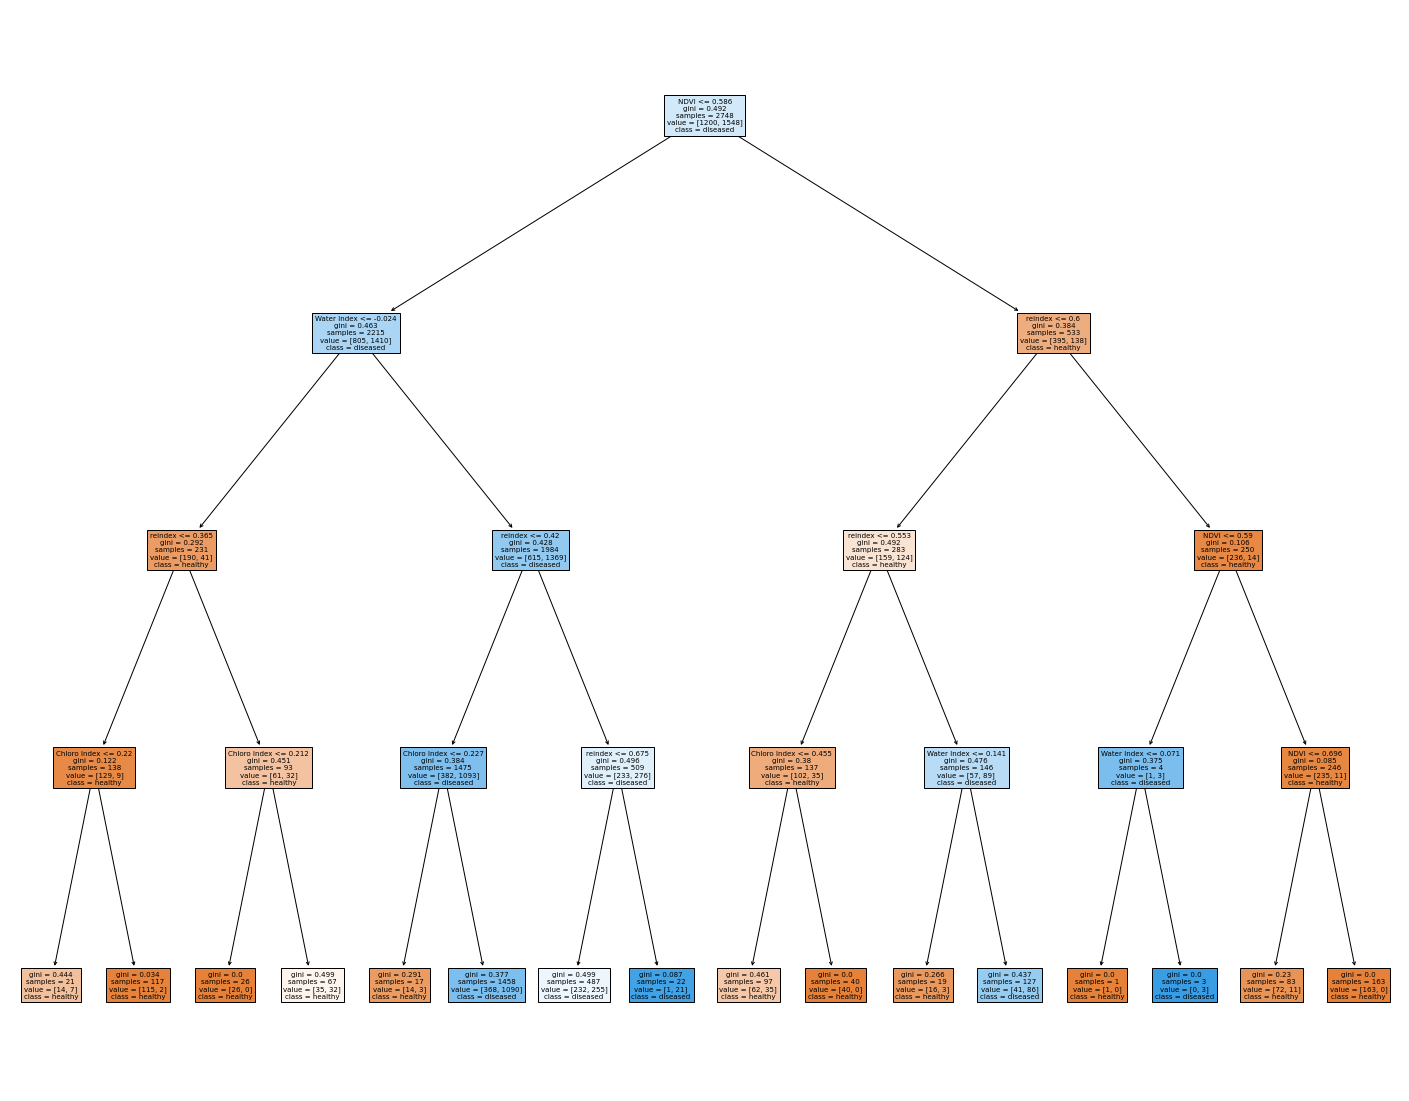

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=takeBands,  
                   class_names=['healthy','diseased'],
                   filled=True)

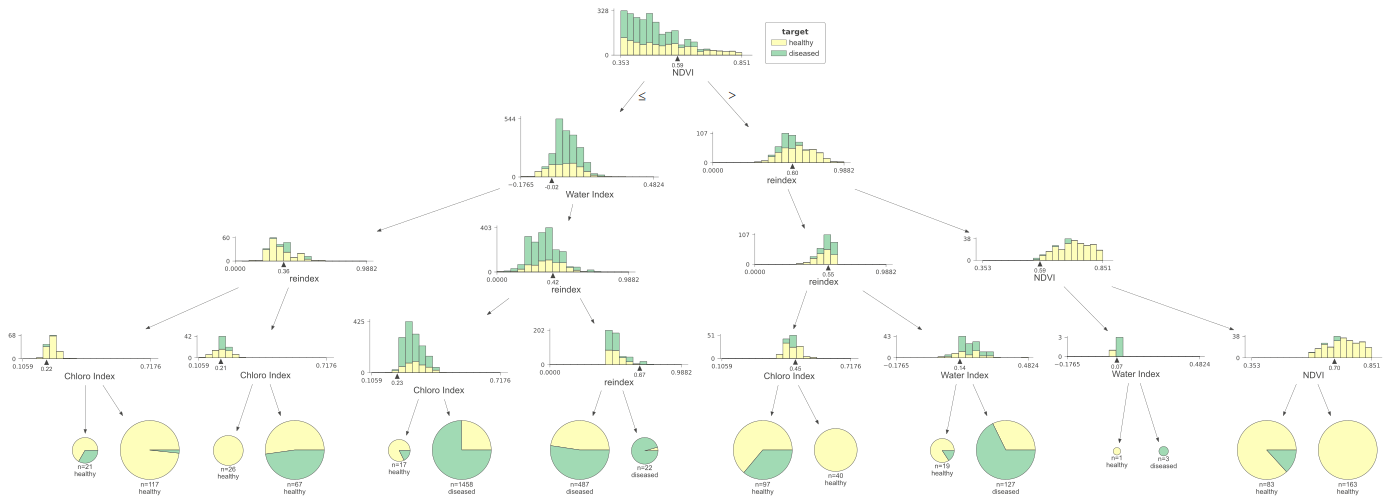

In [41]:
viz = dtreeviz(clf, x, y,
                target_name="target",
                feature_names=takeBands,
                class_names=['healthy','diseased'])

viz